In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
#loading data into panda
movieData = pd.read_csv('DataRaw/train.csv')
#Test data without revenue
testData = pd.read_csv('DataRaw/test.csv')

dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
movieData = text_to_dict(movieData)

testData = text_to_dict(testData)

print('Shape of DataFrames',movieData.shape,testData.shape)
movieData.head()

Shape of DataFrames (3000, 23) (4398, 22)


id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                 {}   3300000   
3   4                                                 {}   1200000   
4   5                                                 {}         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity    ...     \
0  When Lou, who has become the "father of the In...    6.575393    ...      
1  Mia Thermopolis is now a college graduate and ...    8.248895    ...      
2  Under the direction of a ruthless instructor, ...   64.299990    ...      
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936    ...      
4  Marine Boy is the story of a former national s...    1.148070    ...      

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                 {}   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3

Data with all Columns: Before Pre-processing

0    2396
1     604
Name: belongs_to_collection, dtype: int64
Movies by number of genres
2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64


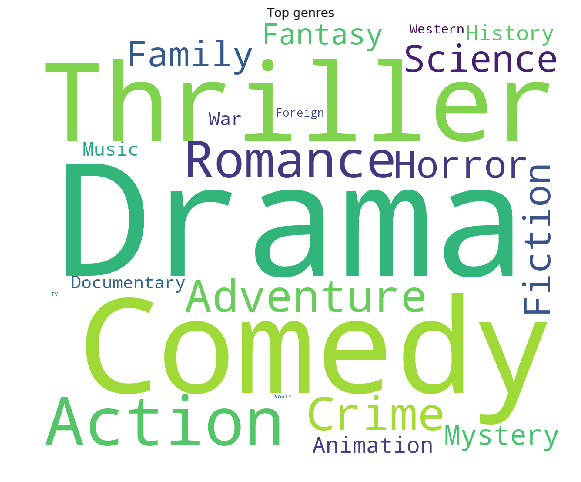

In [4]:
#Clean and extract data

    
print(movieData['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts())
movieData.drop(['belongs_to_collection'],axis=1)
testData.drop(['belongs_to_collection'],axis=1)

print('Movies by number of genres')
print(movieData['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts())
plt.figure(figsize = (12, 8))
list_of_genres = list(movieData['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

text = ' '.join([i for j in list_of_genres for i in j])

from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [5]:
from collections import Counter
Counter([i for j in list_of_genres for i in j]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [6]:
movieData['num_genres'] = movieData['genres'].apply(lambda x: len(x) if x != {} else 0)
movieData['all_genres'] = movieData['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    movieData['genre_' + g] = movieData['all_genres'].apply(lambda x: 1 if g in x else 0)
    
testData['num_genres'] = testData['genres'].apply(lambda x: len(x) if x != {} else 0)
testData['all_genres'] = testData['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    testData['genre_' + g] = testData['all_genres'].apply(lambda x: 1 if g in x else 0)

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
movieData

id                              belongs_to_collection     budget                                             genres                                           homepage    imdb_id original_language                                     original_title                                           overview  popularity                       poster_path                               production_companies                               production_countries release_date  runtime                                   spoken_languages    status                                            tagline                                              title                                           Keywords                                               cast                                               crew     revenue  num_genres                                         all_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  \
0        1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...   14000000                     [{'id': 35, 'name': 'Comedy'}]                                                NaN  tt2637294                en                             Hot Tub Time Machine 2  When Lou, who has become the "father of the In...    6.575393  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  The Laws of Space and Time are About to be Vio...                             Hot Tub Time Machine 2  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  [{'credit_id': '59ac067c92514107af02c8c8', 'de...    12314651           1                                             Comedy            0             1               0             0              0            0                0             0   
1        2  [{'id': 107674, 'name': 'The Princess Diaries ...   40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                                                NaN  tt0368933                en           The Princess Diaries 2: Royal Engagement  Mia Thermopolis is now a college graduate and ...    8.248895  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg        [{'name': 'Walt Disney Pictures', 'id': 2}]  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  It can take a lifetime to find true love; she'...           The Princess Diaries 2: Royal Engagement  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  [{'credit_id': '52fe43fe9251416c7502563d', 'de...    95149435           4                        Comedy Drama Family Romance            1             1               0             0              1            0                0             0   
2        3                                                 {}    3300000                      [{'id': 18, 'name': 'Drama'}]                  http://sonyclassics.com/whiplash/  tt2582802                en                                           Whiplash  Under the direction of a ruthless instructor, ...   64.299990  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  [{'name': 'Bold Films', 'id': 2266}, {'name': ...  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released    The road to greatness can take you to the edge.                                           Whiplash  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...  [{'cast_id': 5, 'character': 'Andrew Neimann',...  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...    13092000           1                                              Drama            1             0               0             0              0            0                0             0   
3        4                                                 {}   

Created a separate column using One-Hot Encoding

In [8]:
print('Movies by number of Production Companies')
print(movieData['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts())

Movies by number of Production Companies
1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64


In [9]:
list_of_produc = list(movieData['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

Counter([i for j in list_of_produc for i in j]).most_common()

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23),
 ('Castle Rock Entertainment', 21),
 ('Epsilon Motion Pictures', 21),
 ('Morgan Creek Productions', 21),
 ('Original Film', 21),
 ('Focus 

I will do a one-hot encoding for top 8 production_companies

In [10]:
movieData['No. of production companies'] = movieData['production_companies'].apply(lambda x: len(x) if x != {} else 0)
movieData['List of production companies'] = movieData['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_produc for i in j]).most_common(8)]
for g in top_companies:
    movieData['isProducedBy_' + g] = movieData['List of production companies'].apply(lambda x: 1 if g in x else 0)
    
testData['No. of production companies'] = testData['production_companies'].apply(lambda x: len(x) if x != {} else 0)
testData['List of production companies'] = testData['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    testData['isProducedBy_' + g] = testData['List of production companies'].apply(lambda x: 1 if g in x else 0)

In [11]:
movieData.head()

id                              belongs_to_collection    budget                                             genres                           homepage    imdb_id original_language                            original_title                                           overview  popularity                       poster_path                               production_companies                               production_countries release_date  runtime                                   spoken_languages    status                                            tagline                                     title                                           Keywords                                               cast                                               crew   revenue  num_genres                   all_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000                     [{'id': 35, 'name': 'Comedy'}]                                NaN  tt2637294                en                    Hot Tub Time Machine 2  When Lou, who has become the "father of the In...    6.575393  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  The Laws of Space and Time are About to be Vio...                    Hot Tub Time Machine 2  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651           1                       Comedy            0             1               0             0              0            0                0             0                      0             0              0              0   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                                NaN  tt0368933                en  The Princess Diaries 2: Royal Engagement  Mia Thermopolis is now a college graduate and ...    8.248895  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg        [{'name': 'Walt Disney Pictures', 'id': 2}]  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  It can take a lifetime to find true love; she'...  The Princess Diaries 2: Royal Engagement  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435           4  Comedy Drama Family Romance            1             1               0             0              1            0                0             0                      0             1              0              0   
2   3                                                 {}   3300000                      [{'id': 18, 'name': 'Drama'}]  http://sonyclassics.com/whiplash/  tt2582802                en                                  Whiplash  Under the direction of a ruthless instructor, ...   64.299990  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  [{'name': 'Bold Films', 'id': 2266}, {'name': ...  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released    The road to greatness can take you to the edge.                                  Whiplash  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...  [{'cast_id': 5, 'character': 'Andrew Neimann',...  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000           1                        Drama            1             0               0             0              0            0                0             0                      0             0              0              0   
3   4                                          

In [12]:
#Repeat the same process for Production Countries

print('Movies by number of Production Countries')
print(movieData['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts())

list_of_coun = list(movieData['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

Counter([i for j in list_of_coun for i in j]).most_common()

Movies by number of Production Countries
1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64


[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10),
 ('Hungary', 9),
 ('United Arab Emirates', 9),
 ('Austria', 8),
 ('Switzerland', 8),
 ('Romania', 8),
 ('Greece', 7),
 ('Norway', 7),
 ('Argentina', 6),
 ('Chile', 6),
 ('Finland', 6),
 ('Israel', 5),
 ('Turkey', 5),
 ('Iran', 5),
 ('Poland', 5),
 ('Morocco', 3),
 ('Philippines', 3),
 ('Taiwan', 3),
 ('Bulgaria', 3),
 ('Bahamas', 3),
 ('Serbia', 2),
 ('Iceland', 2),
 ('Cambodia', 2),
 ('Malta', 2),
 ('Pakistan', 2),
 ('Qatar', 2),
 ('Tunisia', 2),
 ('Ukraine', 2),
 ('Singapore', 2),
 ('Indonesia', 2)

In [13]:
#In this case, I will take into account only the top 6 countries, because there is not enough data for movies produced by other countries

movieData['No. of production coun'] = movieData['production_countries'].apply(lambda x: len(x) if x != {} else 0)
movieData['List of production coun'] = movieData['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

top_coun = [m[0] for m in Counter([i for j in list_of_coun for i in j]).most_common(6)]

for g in top_coun:
    movieData['isProducedIn_' + g] = movieData['List of production coun'].apply(lambda x: 1 if g in x else 0)
    
testData['No. of production coun'] = testData['production_countries'].apply(lambda x: len(x) if x != {} else 0)
testData['List of production coun'] = testData['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

for g in top_coun:
    testData['isProducedIn_' + g] = testData['List of production coun'].apply(lambda x: 1 if g in x else 0)

In [14]:
movieData.head()


id                              belongs_to_collection    budget                                             genres                           homepage    imdb_id original_language                            original_title                                           overview  popularity                       poster_path                               production_companies                               production_countries release_date  runtime                                   spoken_languages    status                                            tagline                                     title                                           Keywords                                               cast                                               crew   revenue  num_genres                   all_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000                     [{'id': 35, 'name': 'Comedy'}]                                NaN  tt2637294                en                    Hot Tub Time Machine 2  When Lou, who has become the "father of the In...    6.575393  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  The Laws of Space and Time are About to be Vio...                    Hot Tub Time Machine 2  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651           1                       Comedy            0             1               0             0              0            0                0             0                      0             0              0              0   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                                NaN  tt0368933                en  The Princess Diaries 2: Royal Engagement  Mia Thermopolis is now a college graduate and ...    8.248895  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg        [{'name': 'Walt Disney Pictures', 'id': 2}]  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  It can take a lifetime to find true love; she'...  The Princess Diaries 2: Royal Engagement  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435           4  Comedy Drama Family Romance            1             1               0             0              1            0                0             0                      0             1              0              0   
2   3                                                 {}   3300000                      [{'id': 18, 'name': 'Drama'}]  http://sonyclassics.com/whiplash/  tt2582802                en                                  Whiplash  Under the direction of a ruthless instructor, ...   64.299990  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  [{'name': 'Bold Films', 'id': 2266}, {'name': ...  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released    The road to greatness can take you to the edge.                                  Whiplash  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...  [{'cast_id': 5, 'character': 'Andrew Neimann',...  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000           1                        Drama            1             0               0             0              0            0                0             0                      0             0              0              0   
3   4                                          

In [15]:
list_of_lang = list(movieData['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_lang for i in j]).most_common(15)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27)]

In [16]:
#Since English language is more than 3/4 of data, I will just make a column "isEnglish"

movieData['No. of lang'] = movieData['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
movieData['List of lang'] = movieData['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

top_lang = [m[0] for m in Counter([i for j in list_of_lang for i in j]).most_common(1)]

for g in top_lang:
    movieData['is_' + g] = movieData['List of lang'].apply(lambda x: 1 if g in x else 0)
    
testData['No. of lang'] = testData['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
testData['List of lang'] = testData['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')

for g in top_lang:
    testData['is_' + g] = testData['List of lang'].apply(lambda x: 1 if g in x else 0)

In [17]:
movieData.head()

id                              belongs_to_collection    budget                                             genres                           homepage    imdb_id original_language                            original_title                                           overview  popularity                       poster_path                               production_companies                               production_countries release_date  runtime                                   spoken_languages    status                                            tagline                                     title                                           Keywords                                               cast                                               crew   revenue  num_genres                   all_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000                     [{'id': 35, 'name': 'Comedy'}]                                NaN  tt2637294                en                    Hot Tub Time Machine 2  When Lou, who has become the "father of the In...    6.575393  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  The Laws of Space and Time are About to be Vio...                    Hot Tub Time Machine 2  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651           1                       Comedy            0             1               0             0              0            0                0             0                      0             0              0              0   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                                NaN  tt0368933                en  The Princess Diaries 2: Royal Engagement  Mia Thermopolis is now a college graduate and ...    8.248895  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg        [{'name': 'Walt Disney Pictures', 'id': 2}]  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  It can take a lifetime to find true love; she'...  The Princess Diaries 2: Royal Engagement  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435           4  Comedy Drama Family Romance            1             1               0             0              1            0                0             0                      0             1              0              0   
2   3                                                 {}   3300000                      [{'id': 18, 'name': 'Drama'}]  http://sonyclassics.com/whiplash/  tt2582802                en                                  Whiplash  Under the direction of a ruthless instructor, ...   64.299990  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  [{'name': 'Bold Films', 'id': 2266}, {'name': ...  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released    The road to greatness can take you to the edge.                                  Whiplash  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...  [{'cast_id': 5, 'character': 'Andrew Neimann',...  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000           1                        Drama            1             0               0             0              0            0                0             0                      0             0              0              0   
3   4                                          

Fixing the Release Data

In [18]:
testData.loc[testData['release_date'].isnull() == True, 'release_date'] = '01/01/98'

#Create a function to fix different formats of dates

def fixYear(x):
    year = x.split('/')[2]
    
    if int(year) < 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year
    
movieData['release_date'] = movieData['release_date'].apply(lambda x: fixYear(x))
testData['release_date'] = testData['release_date'].apply(lambda x: fixYear(x))


#movieData['release_date'] = pd.to_datetime(movieData['release_date'])
#testData['release_date'] = pd.to_datetime(testData['release_date'])
movieData.head()

id                              belongs_to_collection    budget                                             genres                           homepage    imdb_id original_language                            original_title                                           overview  popularity                       poster_path                               production_companies                               production_countries release_date  runtime                                   spoken_languages    status                                            tagline                                     title                                           Keywords                                               cast                                               crew   revenue  num_genres                   all_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000                     [{'id': 35, 'name': 'Comedy'}]                                NaN  tt2637294                en                    Hot Tub Time Machine 2  When Lou, who has become the "father of the In...    6.575393  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  [{'iso_3166_1': 'US', 'name': 'United States o...    2/20/2015     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  The Laws of Space and Time are About to be Vio...                    Hot Tub Time Machine 2  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651           1                       Comedy            0             1               0             0              0            0                0             0                      0             0              0              0   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                                NaN  tt0368933                en  The Princess Diaries 2: Royal Engagement  Mia Thermopolis is now a college graduate and ...    8.248895  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg        [{'name': 'Walt Disney Pictures', 'id': 2}]  [{'iso_3166_1': 'US', 'name': 'United States o...     8/6/2004    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  It can take a lifetime to find true love; she'...  The Princess Diaries 2: Royal Engagement  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435           4  Comedy Drama Family Romance            1             1               0             0              1            0                0             0                      0             1              0              0   
2   3                                                 {}   3300000                      [{'id': 18, 'name': 'Drama'}]  http://sonyclassics.com/whiplash/  tt2582802                en                                  Whiplash  Under the direction of a ruthless instructor, ...   64.299990  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  [{'name': 'Bold Films', 'id': 2266}, {'name': ...  [{'iso_3166_1': 'US', 'name': 'United States o...   10/10/2014    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released    The road to greatness can take you to the edge.                                  Whiplash  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...  [{'cast_id': 5, 'character': 'Andrew Neimann',...  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000           1                        Drama            1             0               0             0              0            0                0             0                      0             0              0              0   
3   4                                          

In [19]:
movieData['release_date'] = pd.to_datetime(movieData['release_date'])
testData['release_date'] = pd.to_datetime(testData['release_date'])

In [20]:
def process_date(date):
    date_components = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_components:
        part_col = 'release_' + part
        date[part_col] = getattr(date['release_date'].dt, part).astype(int)
    
    return date

movieData = process_date(movieData)
testData = process_date(testData)
movieData.head()

id                              belongs_to_collection    budget                                             genres                           homepage    imdb_id original_language                            original_title                                           overview  popularity                       poster_path                               production_companies                               production_countries release_date  runtime                                   spoken_languages    status                                            tagline                                     title                                           Keywords                                               cast                                               crew   revenue  num_genres                   all_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000                     [{'id': 35, 'name': 'Comedy'}]                                NaN  tt2637294                en                    Hot Tub Time Machine 2  When Lou, who has become the "father of the In...    6.575393  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  [{'iso_3166_1': 'US', 'name': 'United States o...   2015-02-20     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  The Laws of Space and Time are About to be Vio...                    Hot Tub Time Machine 2  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651           1                       Comedy            0             1               0             0              0            0                0             0                      0             0              0              0   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                                NaN  tt0368933                en  The Princess Diaries 2: Royal Engagement  Mia Thermopolis is now a college graduate and ...    8.248895  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg        [{'name': 'Walt Disney Pictures', 'id': 2}]  [{'iso_3166_1': 'US', 'name': 'United States o...   2004-08-06    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  It can take a lifetime to find true love; she'...  The Princess Diaries 2: Royal Engagement  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435           4  Comedy Drama Family Romance            1             1               0             0              1            0                0             0                      0             1              0              0   
2   3                                                 {}   3300000                      [{'id': 18, 'name': 'Drama'}]  http://sonyclassics.com/whiplash/  tt2582802                en                                  Whiplash  Under the direction of a ruthless instructor, ...   64.299990  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  [{'name': 'Bold Films', 'id': 2266}, {'name': ...  [{'iso_3166_1': 'US', 'name': 'United States o...   2014-10-10    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released    The road to greatness can take you to the edge.                                  Whiplash  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...  [{'cast_id': 5, 'character': 'Andrew Neimann',...  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000           1                        Drama            1             0               0             0              0            0                0             0                      0             0              0              0   
3   4                                          

In [21]:
print('Number of casted persons/crew in films')
movieData['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

movieData['TotalCast'] = movieData['cast'].apply(lambda x: len(x) if x != {} else 0)
testData['TotalCast'] = testData['cast'].apply(lambda x: len(x) if x != {} else 0)

movieData['TotalCrew'] = movieData['crew'].apply(lambda x: len(x) if x != {} else 0)
testData['TotalCrew'] = testData['crew'].apply(lambda x: len(x) if x != {} else 0)


movieData.head()

Number of casted persons/crew in films


id                              belongs_to_collection    budget                                             genres                           homepage    imdb_id original_language                            original_title                                           overview  popularity                       poster_path                               production_companies                               production_countries release_date  runtime                                   spoken_languages    status                                            tagline                                     title                                           Keywords                                               cast                                               crew   revenue  num_genres                   all_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000                     [{'id': 35, 'name': 'Comedy'}]                                NaN  tt2637294                en                    Hot Tub Time Machine 2  When Lou, who has become the "father of the In...    6.575393  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  [{'iso_3166_1': 'US', 'name': 'United States o...   2015-02-20     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  The Laws of Space and Time are About to be Vio...                    Hot Tub Time Machine 2  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651           1                       Comedy            0             1               0             0              0            0                0             0                      0             0              0              0   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                                NaN  tt0368933                en  The Princess Diaries 2: Royal Engagement  Mia Thermopolis is now a college graduate and ...    8.248895  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg        [{'name': 'Walt Disney Pictures', 'id': 2}]  [{'iso_3166_1': 'US', 'name': 'United States o...   2004-08-06    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  It can take a lifetime to find true love; she'...  The Princess Diaries 2: Royal Engagement  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435           4  Comedy Drama Family Romance            1             1               0             0              1            0                0             0                      0             1              0              0   
2   3                                                 {}   3300000                      [{'id': 18, 'name': 'Drama'}]  http://sonyclassics.com/whiplash/  tt2582802                en                                  Whiplash  Under the direction of a ruthless instructor, ...   64.299990  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  [{'name': 'Bold Films', 'id': 2266}, {'name': ...  [{'iso_3166_1': 'US', 'name': 'United States o...   2014-10-10    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released    The road to greatness can take you to the edge.                                  Whiplash  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...  [{'cast_id': 5, 'character': 'Andrew Neimann',...  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000           1                        Drama            1             0               0             0              0            0                0             0                      0             0              0              0   
3   4                                          

At this point, Data preprocessing is complete:
Now I will be plotting revenue with different features

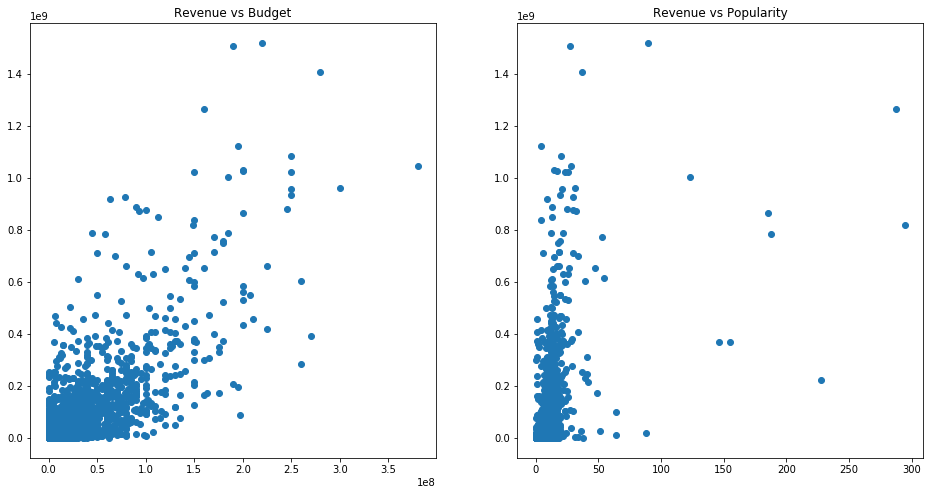

In [22]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movieData['budget'], movieData['revenue'])
plt.title('Revenue vs Budget');

plt.subplot(1, 2, 2)
plt.scatter(movieData['popularity'], movieData['revenue'])
plt.title('Revenue vs Popularity');


Text(0.5, 1.0, 'Revenue vs Runtime')

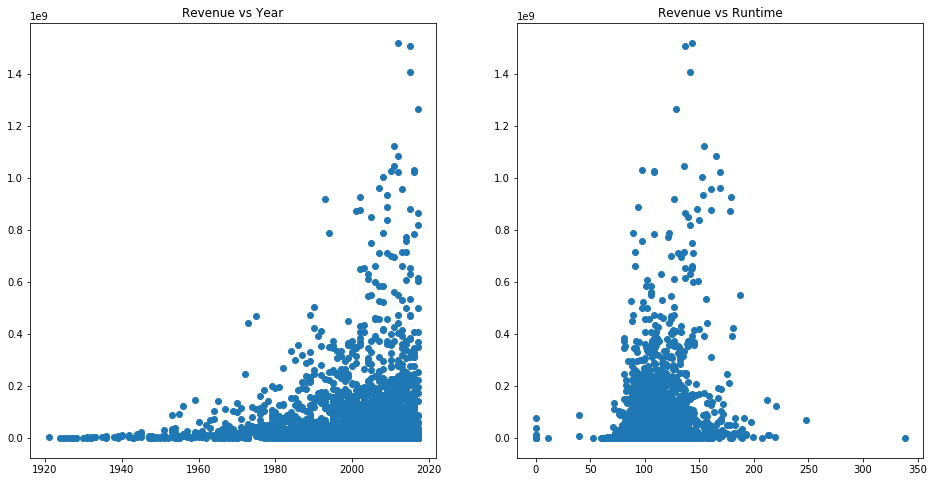

In [23]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movieData['release_year'], movieData['revenue'])
plt.title('Revenue vs Year');

plt.subplot(1, 2, 2)
plt.scatter(movieData['runtime'], movieData['revenue'])
plt.title('Revenue vs Runtime')

Text(0.5, 1.0, 'Revenue vs Crew')

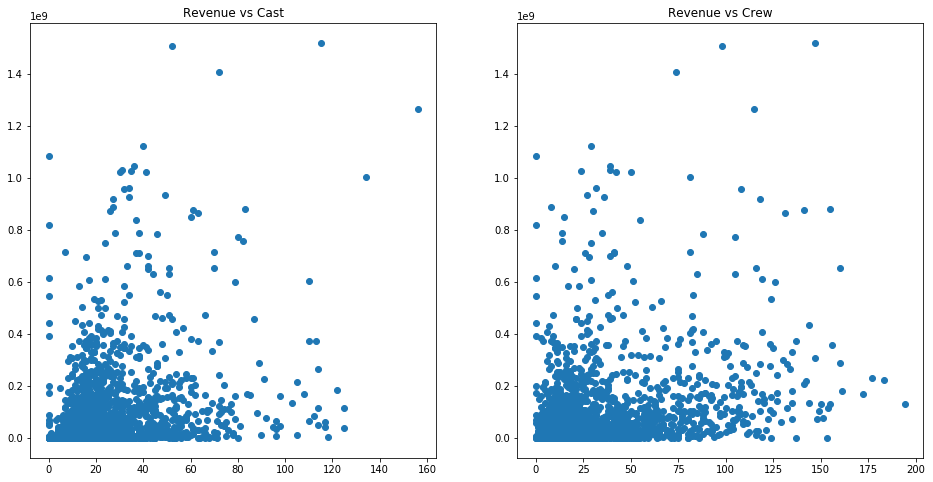

In [24]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movieData['TotalCast'], movieData['revenue'])
plt.title('Revenue vs Cast');

plt.subplot(1, 2, 2)
plt.scatter(movieData['TotalCrew'], movieData['revenue'])
plt.title('Revenue vs Crew')

In [25]:
movieData.head()

id                              belongs_to_collection    budget                                             genres                           homepage    imdb_id original_language                            original_title                                           overview  popularity                       poster_path                               production_companies                               production_countries release_date  runtime                                   spoken_languages    status                                            tagline                                     title                                           Keywords                                               cast                                               crew   revenue  num_genres                   all_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000                     [{'id': 35, 'name': 'Comedy'}]                                NaN  tt2637294                en                    Hot Tub Time Machine 2  When Lou, who has become the "father of the In...    6.575393  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  [{'iso_3166_1': 'US', 'name': 'United States o...   2015-02-20     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  The Laws of Space and Time are About to be Vio...                    Hot Tub Time Machine 2  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651           1                       Comedy            0             1               0             0              0            0                0             0                      0             0              0              0   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                                NaN  tt0368933                en  The Princess Diaries 2: Royal Engagement  Mia Thermopolis is now a college graduate and ...    8.248895  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg        [{'name': 'Walt Disney Pictures', 'id': 2}]  [{'iso_3166_1': 'US', 'name': 'United States o...   2004-08-06    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released  It can take a lifetime to find true love; she'...  The Princess Diaries 2: Royal Engagement  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435           4  Comedy Drama Family Romance            1             1               0             0              1            0                0             0                      0             1              0              0   
2   3                                                 {}   3300000                      [{'id': 18, 'name': 'Drama'}]  http://sonyclassics.com/whiplash/  tt2582802                en                                  Whiplash  Under the direction of a ruthless instructor, ...   64.299990  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  [{'name': 'Bold Films', 'id': 2266}, {'name': ...  [{'iso_3166_1': 'US', 'name': 'United States o...   2014-10-10    105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released    The road to greatness can take you to the edge.                                  Whiplash  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...  [{'cast_id': 5, 'character': 'Andrew Neimann',...  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000           1                        Drama            1             0               0             0              0            0                0             0                      0             0              0              0   
3   4                                          

In [26]:
# movieData = movieData.drop(['id'], axis=1)
# testData = testData.drop(['id'], axis=1)

#del movieData['genres']

# movieData = movieData.drop(['genres'], axis=1)
# testData = testData.drop(['genres'], axis=1)

movieData = movieData.drop(['belongs_to_collection'], axis=1)
testData = testData.drop(['belongs_to_collection'], axis=1)

movieData = movieData.drop(['homepage'], axis=1)
testData = testData.drop(['homepage'], axis=1)

movieData = movieData.drop(['imdb_id'], axis=1)
testData = testData.drop(['imdb_id'], axis=1)



In [27]:
movieData = movieData.drop(['original_title'], axis=1)
testData = testData.drop(['original_title'], axis=1)

movieData = movieData.drop(['overview'], axis=1)
testData = testData.drop(['overview'], axis=1)

movieData = movieData.drop(['poster_path'], axis=1)
testData = testData.drop(['poster_path'], axis=1)

movieData = movieData.drop(['production_companies'], axis=1)
testData = testData.drop(['production_companies'], axis=1)

movieData = movieData.drop(['production_countries'], axis=1)
testData = testData.drop(['production_countries'], axis=1)

movieData = movieData.drop(['release_date'], axis=1)
testData = testData.drop(['release_date'], axis=1)

movieData = movieData.drop(['spoken_languages'], axis=1)
testData = testData.drop(['spoken_languages'], axis=1)

movieData.head()

id    budget                                             genres original_language  popularity  runtime    status                                            tagline                                     title                                           Keywords                                               cast                                               crew   revenue  num_genres                   all_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  genre_Animation  genre_History  genre_Music  No. of production companies                       List of production companies  isProducedBy_Warner Bros.  isProducedBy_Universal Pictures  isProducedBy_Paramount Pictures  isProducedBy_Twentieth Century Fox Film Corporation  isProducedBy_Columbia Pictures  isProducedBy_Metro-Goldwyn-Mayer (MGM)  isProducedBy_New Line Cinema  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]                en    6.575393     93.0  Released  The Laws of Space and Time are About to be Vio...                    Hot Tub Time Machine 2  [{'id': 4379, 'name': 'time travel'}, {'id': 9...  [{'cast_id': 4, 'character': 'Lou', 'credit_id...  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651           1                       Comedy            0             1               0             0              0            0                0             0                      0             0              0              0                0              0            0                            3  Metro-Goldwyn-Mayer (MGM) Paramount Pictures U...                          0                                0                                1                                                  0                                 0                                       1                             0   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...                en    8.248895    113.0  Released  It can take a lifetime to find true love; she'...  The Princess Diaries 2: Royal Engagement  [{'id': 2505, 'name': 'coronation'}, {'id': 42...  [{'cast_id': 1, 'character': 'Mia Thermopolis'...  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435           4  Comedy Drama Family Romance            1             1               0             0              1            0                0             0                      0             1              0              0                0              0            0                            1                               Walt Disney Pictures                          0                                0                                0                                                  0                                 0                                       0                             0   
2   3   3300000                      [{'id': 18, 'name': 'Drama'}]                en   64.299990    105.0  Released    The road to greatness can take you to the edge.                                  Whiplash  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...  [{'cast_id': 5, 'character': 'Andrew Neimann',...  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000           1                        Drama            1             0               0             0              0            0                0             0                      0             0              0              0                0              0            0                            3  Blumhouse Productions Bold Films Right of Way ...                          0                                0                                0                                                  0                                 0                                       0                             0   
3   4   1200000  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...                hi    3.174936    122.0  Released

In [28]:

movieData = movieData.drop(['status'], axis=1)
testData = testData.drop(['status'], axis=1)

movieData = movieData.drop(['tagline'], axis=1)
testData = testData.drop(['tagline'], axis=1)

movieData = movieData.drop(['title'], axis=1)
testData = testData.drop(['title'], axis=1)

movieData = movieData.drop(['Keywords'], axis=1)
testData = testData.drop(['Keywords'], axis=1)

movieData = movieData.drop(['cast'], axis=1)
testData = testData.drop(['cast'], axis=1)

movieData = movieData.drop(['crew'], axis=1)
testData = testData.drop(['crew'], axis=1)

movieData = movieData.drop(['all_genres'], axis=1)
testData = testData.drop(['all_genres'], axis=1)

movieData = movieData.drop(['List of production companies'], axis=1)
testData = testData.drop(['List of production companies'], axis=1)

movieData = movieData.drop(['List of production coun'], axis=1)
testData = testData.drop(['List of production coun'], axis=1)

movieData = movieData.drop(['List of lang'], axis=1)
testData = testData.drop(['List of lang'], axis=1)

movieData = movieData.drop(['id'], axis=1)
testData = testData.drop(['id'], axis=1)


movieData = movieData.drop(['genres'], axis=1)
testData = testData.drop(['genres'], axis=1)

movieData = movieData.drop(['original_language'], axis=1)
testData = testData.drop(['original_language'], axis=1)



In [29]:
revdata = pd.DataFrame(data=movieData['revenue'])

movieData.at[1335,'runtime'] = 0.0
movieData.at[2302,'runtime'] = 0.0

y = revdata.as_matrix()

movieData=movieData.drop(['revenue'], axis=1)

X = movieData.as_matrix()

#movieData.isnull()




#movieData[movieData.isin().any(axis=1)]
movieData


C:\Users\nishc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\nishc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


budget  popularity  runtime  num_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  genre_Animation  genre_History  genre_Music  No. of production companies  isProducedBy_Warner Bros.  isProducedBy_Universal Pictures  isProducedBy_Paramount Pictures  isProducedBy_Twentieth Century Fox Film Corporation  isProducedBy_Columbia Pictures  isProducedBy_Metro-Goldwyn-Mayer (MGM)  isProducedBy_New Line Cinema  isProducedBy_Touchstone Pictures  No. of production coun  isProducedIn_United States of America  isProducedIn_United Kingdom  isProducedIn_France  isProducedIn_Germany  isProducedIn_Canada  isProducedIn_India  No. of lang  is_English  release_year  release_weekday  release_month  release_weekofyear  release_day  release_quarter  TotalCast  TotalCrew
0      14000000    6.575393     93.0           1            0             1               0             0              0            0                0             0                      0             0              0              0                0              0            0                            3                          0                                0                                1                                                  0                                 0                                       1                             0                                 0                       1                                      1                            0                    0                     0                    0                   0            1           1          2015                4              2                   8           20                1         24         72
1      40000000    8.248895    113.0           4            1             1               0             0              1            0                0             0                      0             1              0              0                0              0            0                            1                          0                                0                                0                                                  0                                 0                                       0                             0                                 0                       1                                      1                            0                    0                     0                    0                   0            1           1          2004                4              8                  32            6                3         20          9
2       3300000   64.299990    105.0           1            1             0               0             0              0            0                0             0                      0             0              0              0                0              0            0                            3                          0                                0                                0                                                  0                                 0                                       0                             0                                 0                       1                                      1                            0                    0                     0                    0                   0            1           1          2014                4             10                  41           10                4         51         64
3       1200000    3.174936    122.0           2            1             0               1             0              0            0                0             0                      0             0              0              0                0              0            0                            0                          0                                0                

In [30]:
from sklearn.preprocessing import Imputer

#movieData = Imputer().fit_transform(movieData)

movieData

budget  popularity  runtime  num_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  genre_Animation  genre_History  genre_Music  No. of production companies  isProducedBy_Warner Bros.  isProducedBy_Universal Pictures  isProducedBy_Paramount Pictures  isProducedBy_Twentieth Century Fox Film Corporation  isProducedBy_Columbia Pictures  isProducedBy_Metro-Goldwyn-Mayer (MGM)  isProducedBy_New Line Cinema  isProducedBy_Touchstone Pictures  No. of production coun  isProducedIn_United States of America  isProducedIn_United Kingdom  isProducedIn_France  isProducedIn_Germany  isProducedIn_Canada  isProducedIn_India  No. of lang  is_English  release_year  release_weekday  release_month  release_weekofyear  release_day  release_quarter  TotalCast  TotalCrew
0      14000000    6.575393     93.0           1            0             1               0             0              0            0                0             0                      0             0              0              0                0              0            0                            3                          0                                0                                1                                                  0                                 0                                       1                             0                                 0                       1                                      1                            0                    0                     0                    0                   0            1           1          2015                4              2                   8           20                1         24         72
1      40000000    8.248895    113.0           4            1             1               0             0              1            0                0             0                      0             1              0              0                0              0            0                            1                          0                                0                                0                                                  0                                 0                                       0                             0                                 0                       1                                      1                            0                    0                     0                    0                   0            1           1          2004                4              8                  32            6                3         20          9
2       3300000   64.299990    105.0           1            1             0               0             0              0            0                0             0                      0             0              0              0                0              0            0                            3                          0                                0                                0                                                  0                                 0                                       0                             0                                 0                       1                                      1                            0                    0                     0                    0                   0            1           1          2014                4             10                  41           10                4         51         64
3       1200000    3.174936    122.0           2            1             0               1             0              0            0                0             0                      0             0              0              0                0              0            0                            0                          0                                0                

In [31]:
revdata.head()

movieData.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

n_est = []

model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber'
)

print(X.shape)
print(y_train.shape)

(3000, 45)
(2100, 1)


In [32]:
print(y.reshape((-1,1)).shape)
print(y.reshape((1,-1)).shape)
temp = np.array(y)
print(temp.flatten().shape)

(3000, 1)
(1, 3000)
(3000,)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [34]:
X

array([[1.4000000e+07, 6.5753930e+00, 9.3000000e+01, ..., 1.0000000e+00,
        2.4000000e+01, 7.2000000e+01],
       [4.0000000e+07, 8.2488950e+00, 1.1300000e+02, ..., 3.0000000e+00,
        2.0000000e+01, 9.0000000e+00],
       [3.3000000e+06, 6.4299990e+01, 1.0500000e+02, ..., 4.0000000e+00,
        5.1000000e+01, 6.4000000e+01],
       ...,
       [6.5000000e+07, 1.4482345e+01, 1.2000000e+02, ..., 4.0000000e+00,
        1.5000000e+01, 1.0000000e+01],
       [4.2000000e+07, 1.5725542e+01, 9.0000000e+01, ..., 1.0000000e+00,
        2.6000000e+01, 8.9000000e+01],
       [3.5000000e+07, 1.0512109e+01, 1.0600000e+02, ..., 3.0000000e+00,
        3.4000000e+01, 4.8000000e+01]])

In [35]:
#scaler = StandardScaler()
#x2 = scaler.fit_transform(X_train)

#model = LinearRegression()


model.fit(X_train,y_train) #.flatten())

# Find the error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

C:\Users\nishc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Set Mean Absolute Error: 8928319.0524
Test Set Mean Absolute Error: 42178217.5891


In [36]:
print(X_train)

[[5.500000e+06 1.250293e+00 1.400000e+02 ... 3.000000e+00 1.000000e+01
  1.000000e+00]
 [2.700000e+07 1.115092e+01 1.100000e+02 ... 1.000000e+00 1.700000e+01
  1.600000e+01]
 [0.000000e+00 6.184340e-01 1.160000e+02 ... 3.000000e+00 7.000000e+00
  1.400000e+01]
 ...
 [2.000000e+07 9.502332e+00 9.800000e+01 ... 2.000000e+00 1.400000e+01
  1.000000e+01]
 [5.000000e+06 2.065280e+00 8.400000e+01 ... 2.000000e+00 1.600000e+01
  6.000000e+00]
 [5.000000e+06 3.991560e-01 9.000000e+01 ... 1.000000e+00 1.300000e+01
  3.000000e+00]]


In [37]:
dat = model.predict(X_test)
dat= pd.Series(dat,name='predicted_rev')
dat.name

'predicted_rev'

In [38]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 8EDD-15BC

 Directory of C:\Users\nishc\Documents\Spring 2019\ML Proj\ML-Box-Office

13-Apr-19  07:34 PM    <DIR>          .
13-Apr-19  07:34 PM    <DIR>          ..
12-Mar-19  07:20 PM             1,307 .gitignore
17-Mar-19  09:04 PM    <DIR>          .ipynb_checkpoints
17-Mar-19  04:26 PM    <DIR>          Data
16-Mar-19  12:53 PM            37,904 data.html
12-Apr-19  08:26 PM    <DIR>          DataRaw
13-Apr-19  07:34 PM            35,726 Hellow.ipynb
16-Mar-19  12:54 PM             2,942 One.py
12-Apr-19  07:36 PM           549,535 output.csv
12-Apr-19  07:49 PM           610,597 outputf.csv
12-Mar-19  07:20 PM                15 README.md
17-Mar-19  09:03 PM            17,194 Untitled.ipynb
12-Mar-19  07:25 PM               547 ViewData.py
               9 File(s)      1,255,767 bytes
               5 Dir(s)  120,708,739,072 bytes free


In [39]:
pd.concat([testData,dat],axis=1).to_csv('output.csv')

In [40]:
# movieData.at[1335,'runtime'] = 0.0
# movieData.at[2302,'runtime'] = 0.0

# y = revdata.as_matrix()

# movieData=movieData.drop(['revenue'], axis=1)

# X = movieData.as_matrix()

# #movieData.isnull()


testData.at[243,'runtime'] = 0.0
testData.at[1489,'runtime'] = 0.0

testData.at[1632,'runtime'] = 0.0
testData.at[3817,'runtime'] = 0.0

testData.head()

budget  popularity  runtime  num_genres  genre_Drama  genre_Comedy  genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  genre_Animation  genre_History  genre_Music  No. of production companies  isProducedBy_Warner Bros.  isProducedBy_Universal Pictures  isProducedBy_Paramount Pictures  isProducedBy_Twentieth Century Fox Film Corporation  isProducedBy_Columbia Pictures  isProducedBy_Metro-Goldwyn-Mayer (MGM)  isProducedBy_New Line Cinema  isProducedBy_Touchstone Pictures  No. of production coun  isProducedIn_United States of America  isProducedIn_United Kingdom  isProducedIn_France  isProducedIn_Germany  isProducedIn_Canada  isProducedIn_India  No. of lang  is_English  release_year  release_weekday  release_month  release_weekofyear  release_day  release_quarter  TotalCast  TotalCrew
0        0    3.851534     90.0           4            0             0               0             0              0            0                1             0                      0             1              1              0                1              0            0                            0                          0                                0                                0                                                  0                                 0                                       0                             0                                 0                       2                                      1                            0                    0                     0                    0                   0            2           1          2007                5              7                  28           14                3          7          2
1    88000    3.559789     65.0           2            0             0               0             0              0            0                0             1                      1             0              0              0                0              0            0                            1                          0                                0                                0                                                  0                                 0                                       0                             0                                 0                       1                                      1                            0                    0                     0                    0                   0            1           1          1958                0              5                  21           19                2         10          8
2        0    8.085194    100.0           2            0             1               0             0              1            0                0             0                      0             0              0              0                0              0            0                            3                          1                                0                                0                                                  0                                 0                                       0                             0                                 0                       1                                      1                            0                    0                     0                    0                   0            1           1          1997                4              5                  21           23                2          9         10
3  6800000    8.596012    130.0           3            1             0               0             0              0            0                0             0                      0             0              0              1                0              0            0                            3                          0                                0                                0   

In [41]:
testData.head()


final_test_x = testData.as_matrix()

dat2 = model.predict(final_test_x)
dat2= pd.Series(dat2,name='predicted_rev')
dat2.name

pd.concat([testData,dat2],axis=1).to_csv('outputf.csv')

C:\Users\nishc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [43]:
model = ensemble.GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['ls', 'lad', 'huber']
}

gs_cv = GridSearchCV(model, param_grid, n_jobs=4)

gs_cv.fit(X_train, y_train)

print(gs_cv.best_params_)


mse = mean_absolute_error(y_train, gs_cv.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

mse = mean_absolute_error(y_test, gs_cv.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

C:\Users\nishc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\nishc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 4, 'max_features': 0.1, 'min_samples_leaf': 3, 'n_estimators': 1000}
Training Set Mean Absolute Error: 17161391.2736
Test Set Mean Absolute Error: 41650699.8257


In [44]:
final_test_x = testData.as_matrix()

dat2 = gs_cv.predict(final_test_x)
dat2= pd.Series(dat2,name='predicted_rev')
dat2.name

pd.concat([testData,dat2],axis=1).to_csv('outputfinal.csv')

C:\Users\nishc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
